In [1]:
from graph_class import *
from nltk_class import *
import os
import seaborn as sns
import numpy as np

In [2]:
with open('twitter.json', 'r') as file:
    tweet = pd.DataFrame(json.load(file))

In [3]:
nlp = NltkTextProcessing()
tweet_df = nlp.process_df_text_column(tweet, save=False)
tweet_df = nlp.process_df_hash_column(tweet_df)
unique_df = nlp.keep_unique(tweet_df)
unique_df.head(1)

,created_at,id,tweet_text,is_reply,reply_count,retweet_count,hashtags,external_url,author_followers,author_follow,author_loc,media_text
0,2021-08-21 10:22:57,1429026229592764417,"[oltre, milion, ebre, militar, rom, omosessual...",False,0,0,None,https://twitter.com/i/web/status/1429026229592...,527,951,Roma,None


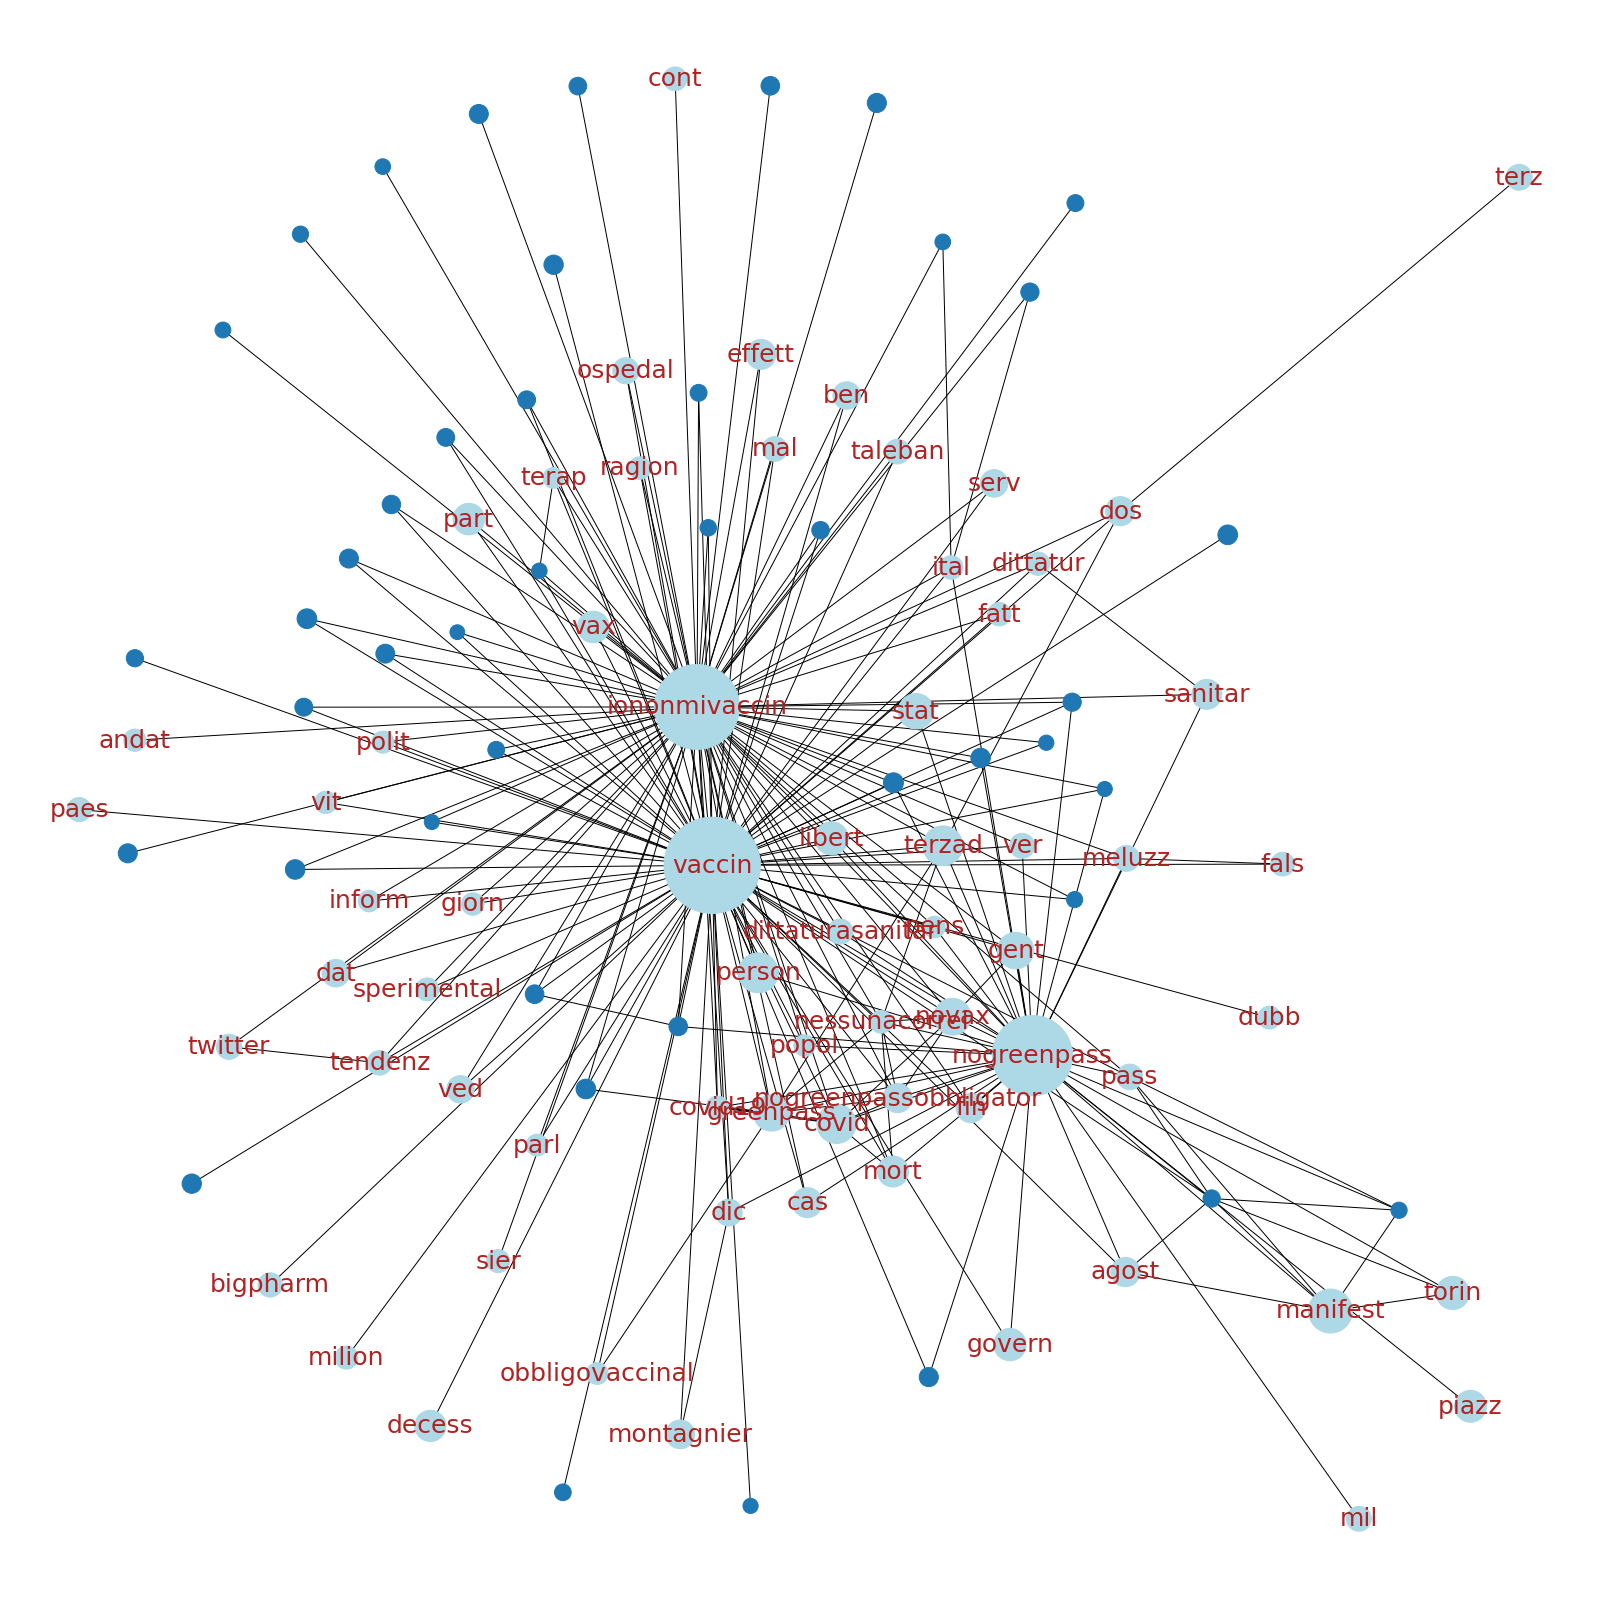

In [4]:
freq_distrib_tweet = nlp.frequency_dist(tweet_df, obj ='tweet')
graph_tweet = filter_pairwise_words(graph_filtered_dist(df=unique_df, distrib=freq_distrib_tweet, thresold=200), thresold=40)
NetworkPlot(graph=graph_tweet, frequency_dist=freq_distrib_tweet, label_thresold=400, color_thresold=400).plot()

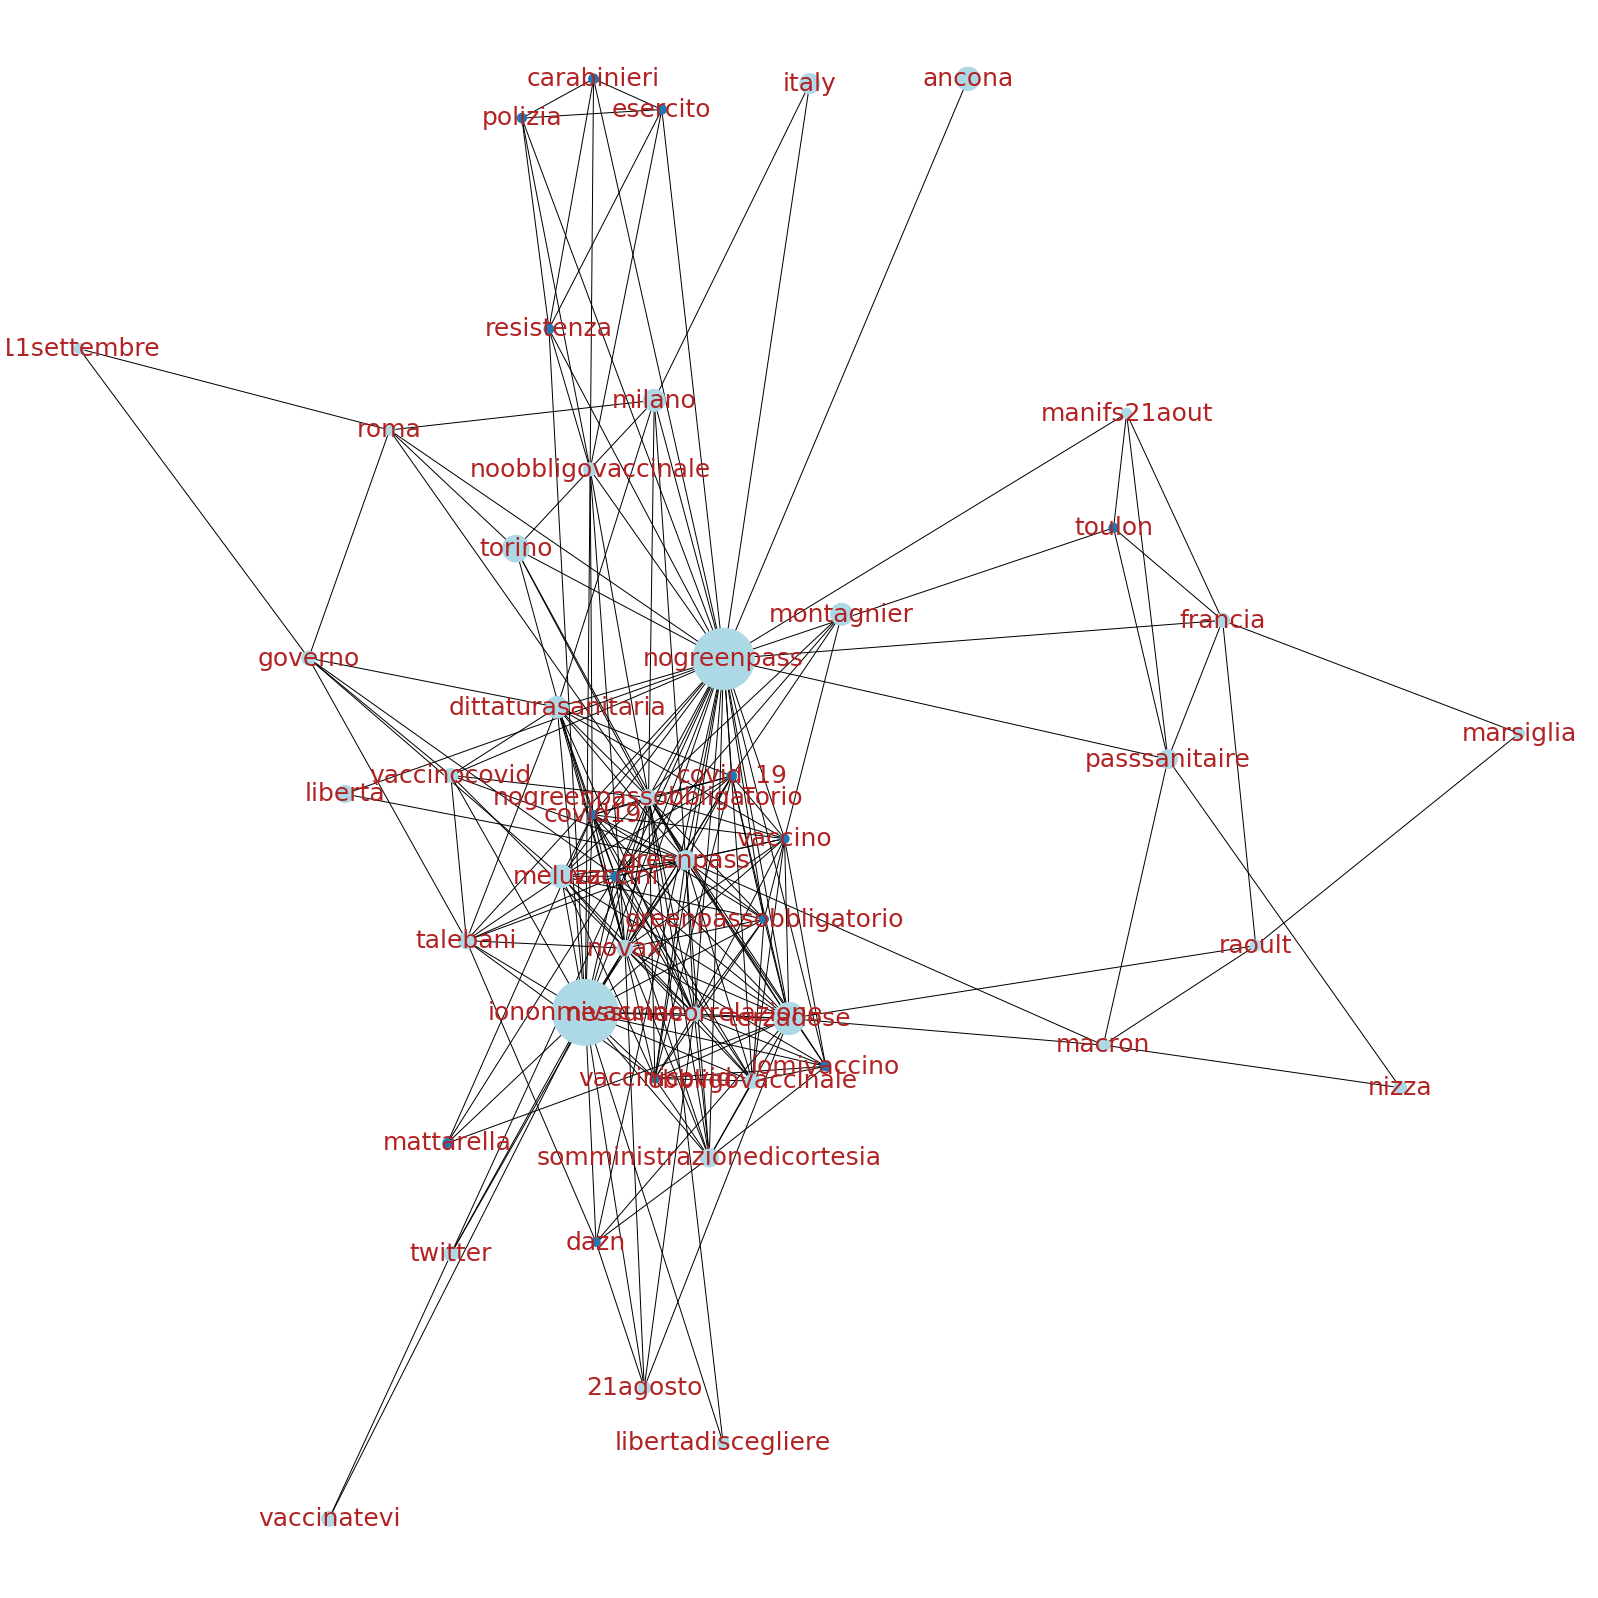

In [5]:
freq_distrib_hash = nlp.frequency_dist(tweet_df, obj ='hash')
graph_hash = graph_filtered_dist(df=unique_df, distrib=freq_distrib_hash, thresold=70, obj='hash')
NetworkPlot(graph= graph_hash, frequency_dist=freq_distrib_hash, label_thresold=50, color_thresold=100).plot()

In [13]:
[i for i in nlp.extract_external_url(tweet_df) if i['freq'] > 50]

TypeError: string indices must be integers

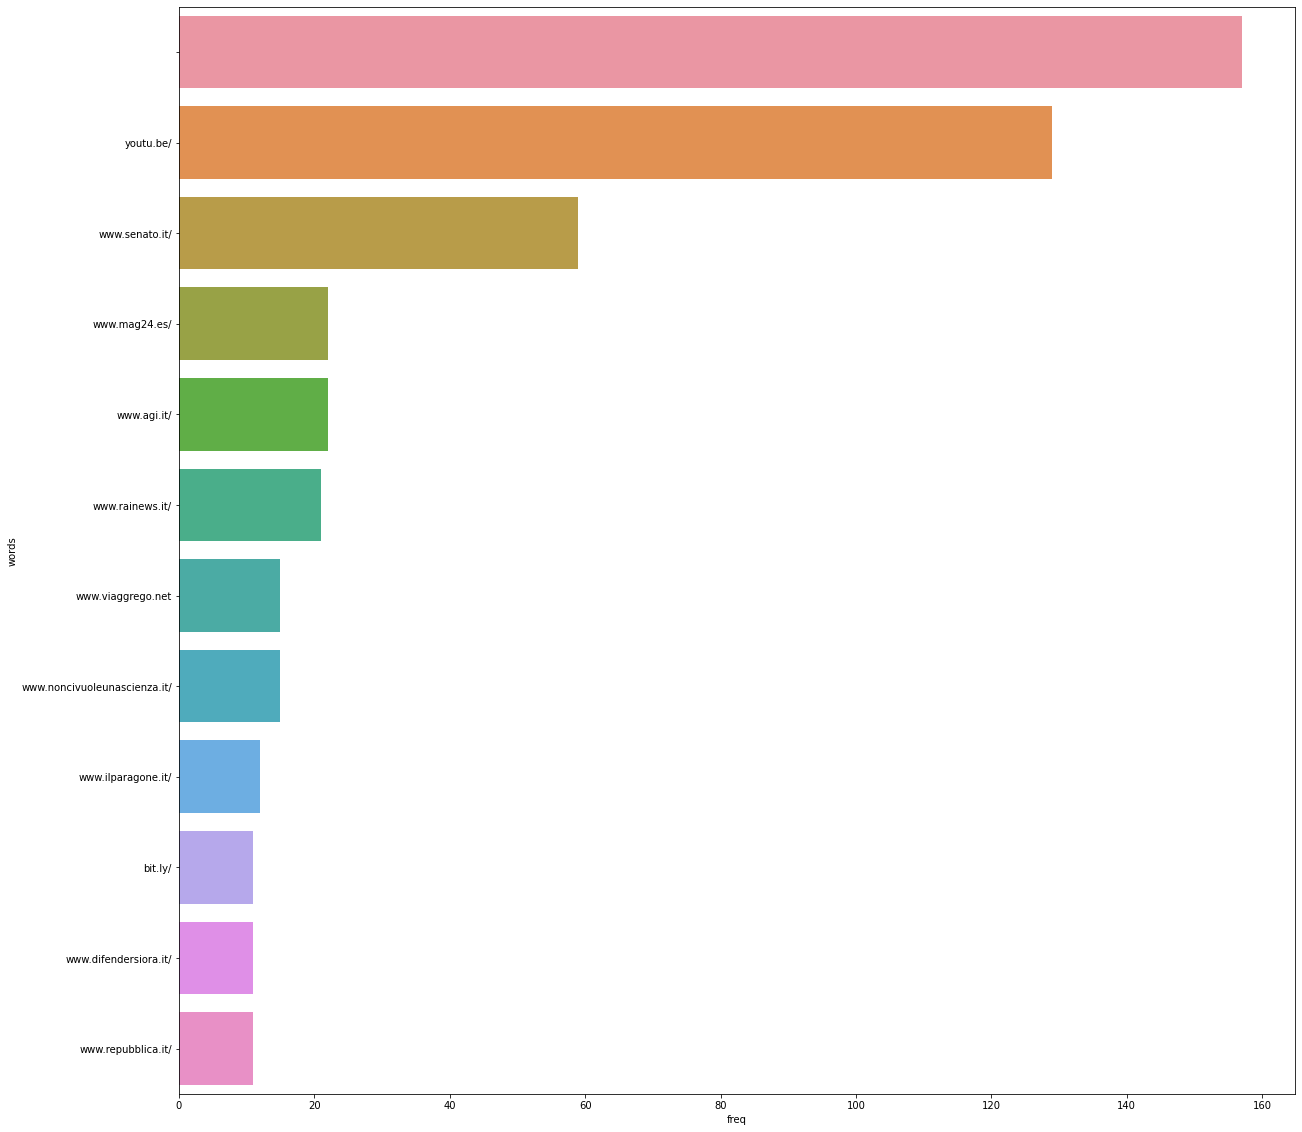

In [6]:
count_barplot(nlp.extract_external_url(tweet_df), 10)

In [7]:
text_to_vectorize = unique_df['tweet_text'].apply(lambda x: ' '.join(x)).values.tolist()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline


vectorizer = TfidfVectorizer(ngram_range=(1,1), norm='l2')  # 1,2 low variance explained
svd = TruncatedSVD(n_components=500, n_iter=10)  #n_components for LDA 100+
normalizer = Normalizer(norm='l2', copy=False)

lsa = make_pipeline(vectorizer, svd, normalizer)
encoded = lsa.fit_transform(text_to_vectorize)

print(f"Explained variance of the SVD step: {svd.explained_variance_ratio_.sum()}%")

Explained variance of the SVD step: 0.5225562441150412%


In [9]:
vectorizer = TfidfVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(text_to_vectorize)
pd.DataFrame(dtm.toarray(),index=text_to_vectorize,columns=vectorizer.get_feature_names()).head(2)

,19,29,a0xlp74lne,aaa,aacmgmzanz,aanzibma3f,abbandon,abbass,abbast,abbatt,...,zombies,zon,zonabianc,zonabu,zoo,zucc,zuppett,zxj7yg8qddhttps,zzzikk,zzzokk
oltre milion ebre militar rom omosessual dissident polit rivolt tomb greenpass qrcod lasciapass marchioverd vaccin dittaturasanitar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dirann ness molt gent dovr rend cont aver esegu ordin iononmivaccin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# import umap

# reducer = umap.UMAP(random_state=42, 
#                     n_neighbors= 10 , 
#                     metric='euclidean',
#                     n_components=2, min_dist=0.5)

# reducer.fit(encoded)
# embedding = reducer.transform(encoded)

# fig=plt.figure(figsize=(15,10))

# sns.set_style('white')
# sns.scatterplot(data=pd.DataFrame(embedding,  columns = [f'cmp_{i+1}' for i in range(2)]),
#                 x= 'cmp_1', 
#                 y = 'cmp_2',
#                 alpha=0.7,
#                 legend=True)


# plt.show()